<a href="https://colab.research.google.com/github/001ckk/Hypothesis-Testing-/blob/main/%22Moringa_Data_Science_Core_W4_Independent_Project_2022_05_Christopher_Kimani_Python_Notebook_%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HYPOTHESIS TESTING**

##a) Data Analytic Question
We aim at Investigating a claim regarding the blue cars from the Autolib dataset.

**Null**: Sample mean from postal code 75001 is equal to sample mean from postal code 75002

**Alternative**: Sample mean from postal code 75001 is not equal to sample mean from postal code 75002


##b) Defining the Metric for Success 

In order to work on the above problem, the following will need to be done:

a) Find and deal with outliers, anomalies, and missing data within the dataset.

b) Plot appropriate univariate and bivariate summaries recording our observations.

c) Implement the solution by performing hypothesis testing. 

##c) Understanding the context
Having been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.


##e) Relevance of the data

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).The data provided aligns with the context of our study.
The dataset and glossary to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset and here [http://bit.ly/DSCoreAutolibDatasetGlossary] respectively.

**Loading libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro 
from scipy import stats
import scipy.stats
from scipy.stats import ttest_ind
from scipy import stats as st

**Uploading the Data**

In [2]:
# loading the description information

description = pd.read_excel("columns_explanation.xlsx")
description 

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [3]:
# Loading the autolib data 

data = pd.read_csv("autolib_daily_events_postal_code.csv")
data.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


**Data Cleaning**

In [4]:
# Checking missing data 
data.isnull().sum()

# There are no null values in the data.

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [5]:
# Checking outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = data[((data < (Q1 - 1.5*IQR))|(data > (Q3 + 1.5*IQR)))]
outliers.count()

# since there are too many outliers. It is best to work with them to avoid distorting the analysis.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


Postal code               3899
date                         0
n_daily_data_points       2670
dayOfWeek                    0
day_type                     0
BlueCars_taken_sum        2215
BlueCars_returned_sum     2213
Utilib_taken_sum          1783
Utilib_returned_sum       1770
Utilib_14_taken_sum       1815
Utilib_14_returned_sum    1820
Slots_freed_sum           3235
Slots_taken_sum           3234
dtype: int64

In [6]:
# Checking for anomalies.
data.info()

# There are no anomalies in this data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


**Univariate Analysis**


In [9]:
# checking the number of weekday and weekend entries

data['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [10]:
# Exctracting only the relevant columns 

group = data.groupby(['Postal code'])['BlueCars_taken_sum','BlueCars_returned_sum'].sum().head(10)
group

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BlueCars_taken_sum,BlueCars_returned_sum
Postal code,,
75001,20995,20974
75002,27143,27129
75003,37188,37154
75004,31454,31449
75005,47766,47753
75006,41514,41491
75007,45285,45191
75008,68247,68195
75009,52903,52861


Text(0, 0.5, 'sum of BlueCars_taken')

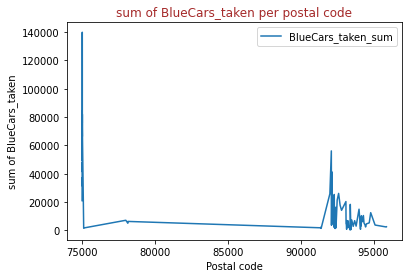

In [11]:
# Curve showing the sum of BlueCars_taken per postal code

data.groupby('Postal code')['BlueCars_taken_sum'].sum().plot(legend=True)
plt.title('sum of BlueCars_taken per postal code', color = 'brown')
plt.ylabel('sum of BlueCars_taken')

# This shows the mean 'BlueCars_taken_sum' per postal code
# Postal code 75008 had the highest sum of BlueCars_taken_sum

Text(0, 0.5, 'sum of BlueCars_returned')

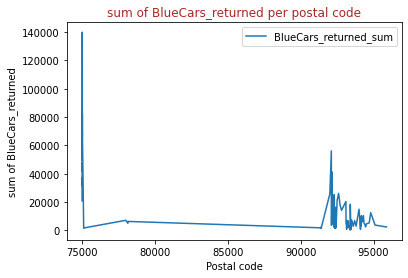

In [12]:
# Curve showing the sum of BlueCars_returned per postal code

data.groupby('Postal code')['BlueCars_returned_sum'].sum().plot(legend=True)
plt.title('sum of BlueCars_returned per postal code', color = 'brown')
plt.ylabel('sum of BlueCars_returned')

# This shows the mean 'BlueCars_returned_sum' per postal code
# Postal code 75008 had the highest sum of BlueCars_returned_sum

*Measures of Central Tendancy and Dispersion*

In [14]:
# mode, median, skewness, kurtosis, range

In [15]:
# Description of the data.
# Shows different statistical charecteristics of the data 

data.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [57]:
# mode

data.mode().count()

# This is the number that occurs the most in the data

Postal code               89
date                      47
n_daily_data_points        1
dayOfWeek                  1
day_type                   1
BlueCars_taken_sum         1
BlueCars_returned_sum      1
Utilib_taken_sum           1
Utilib_returned_sum        1
Utilib_14_taken_sum        1
Utilib_14_returned_sum     1
Slots_freed_sum            1
Slots_taken_sum            1
dtype: int64

In [59]:
# median

data.median()

# This is the middle number in the data 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Postal code               92340.0
n_daily_data_points        1440.0
dayOfWeek                     3.0
BlueCars_taken_sum           46.0
BlueCars_returned_sum        46.0
Utilib_taken_sum              1.0
Utilib_returned_sum           1.0
Utilib_14_taken_sum           3.0
Utilib_14_returned_sum        3.0
Slots_freed_sum               0.0
Slots_taken_sum               0.0
dtype: float64

In [18]:
# range 
max = data.loc[:, ~data.columns.isin(['date', 'day_type'])].max()
min = data.loc[:, ~data.columns.isin(['date', 'day_type'])].min()
range = max - min
range

# This is the difference in the largest and the least number per column

Postal code               20879
n_daily_data_points         266
dayOfWeek                     6
BlueCars_taken_sum         1352
BlueCars_returned_sum      1332
Utilib_taken_sum             54
Utilib_returned_sum          58
Utilib_14_taken_sum         100
Utilib_14_returned_sum      101
Slots_freed_sum             360
Slots_taken_sum             359
dtype: int64

In [19]:
# skewness

data.skew()

# This shows the skewness of all columns in the data 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Postal code              -1.168778
n_daily_data_points      -5.742776
dayOfWeek                 0.018824
BlueCars_taken_sum        2.406355
BlueCars_returned_sum     2.412085
Utilib_taken_sum          2.556872
Utilib_returned_sum       2.578665
Utilib_14_taken_sum       2.510924
Utilib_14_returned_sum    2.511488
Slots_freed_sum           2.597406
Slots_taken_sum           2.596904
dtype: float64

In [20]:
# kurtosis

data.kurt()

# This shows the kurtosis per column in the dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Postal code               -0.542143
n_daily_data_points       36.594846
dayOfWeek                 -1.260994
BlueCars_taken_sum         6.172692
BlueCars_returned_sum      6.186288
Utilib_taken_sum           7.702362
Utilib_returned_sum        7.936357
Utilib_14_taken_sum        7.186815
Utilib_14_returned_sum     7.185463
Slots_freed_sum            6.454514
Slots_taken_sum            6.442553
dtype: float64

**Bivariate Analysis**

In [21]:
# Correlation co-efficient.

coefficient = data['BlueCars_taken_sum'].corr(data['BlueCars_returned_sum']) 

print(coefficient)

# Positive almost perfect correlation


0.9986597051672199


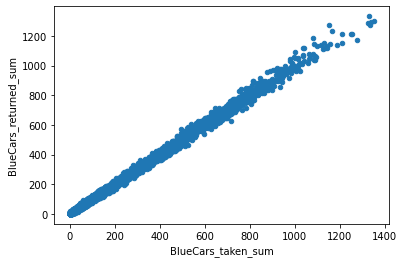

In [22]:
# Scatter plot showing the relationship between BlueCars_taken and BlueCars_returned.

data.plot(x = 'BlueCars_taken_sum', y ='BlueCars_returned_sum' , kind='scatter')


# Shows a positive near perfect relationship between the two items

In [23]:
group = data.groupby(['Postal code'])['BlueCars_taken_sum','BlueCars_returned_sum'].sum().head(10)
group

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BlueCars_taken_sum,BlueCars_returned_sum
Postal code,,
75001,20995,20974
75002,27143,27129
75003,37188,37154
75004,31454,31449
75005,47766,47753
75006,41514,41491
75007,45285,45191
75008,68247,68195
75009,52903,52861


In [24]:
data.groupby(['Postal code']).sum().head(10)

# Group by for the whole data

,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,,,,,,,,,,
75001,223281,463,20995,20974,575,575,1441,1441,3498,3490
75002,223281,463,27143,27129,756,758,1756,1753,5471,5474
75003,223281,463,37188,37154,1058,1058,2292,2292,9543,9544
75004,223281,463,31454,31449,826,827,2273,2267,7234,7238
75005,223281,463,47766,47753,1341,1334,2940,2939,14262,14248
75006,223281,463,41514,41491,1012,1009,2498,2499,7873,7864
75007,223281,463,45285,45191,1172,1171,2704,2700,14500,14484
75008,223281,463,68247,68195,1827,1829,4123,4120,20923,20899
75009,223281,463,52903,52861,1436,1441,3452,3449,12132,12118


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'sum of BlueCars_taken and BlueCars_returned_sum')

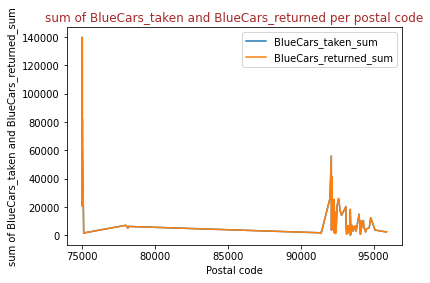

In [25]:
# The relationshp of both BlueCars_taken_sum and BlueCars_returned_sum per postal code

data.groupby('Postal code')['BlueCars_taken_sum','BlueCars_returned_sum'].sum().plot(legend=True)
plt.title('sum of BlueCars_taken and BlueCars_returned per postal code', color = 'brown')
plt.ylabel('sum of BlueCars_taken and BlueCars_returned_sum')

# Shows the relationshp of both BlueCars_taken_sum and BlueCars_returned_sum per postal code

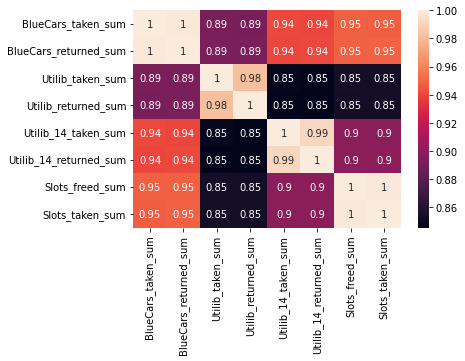

In [26]:
# Heat-map
# Correlations for all numerical column variables 
sns.heatmap(data.loc[:, ~data.columns.isin(['date', 'day_type','Postal code','n_daily_data_points','dayOfWeek'])].corr(),annot=True)


**Hypothesis Testing**

**Null**:        Sample mean from postal code 75001 is equal to sample mean from postal code 75002


**Alternative**: Sample mean from postal code 75001 is not equal to sample mean from postal code 75002

**Sampling**

*stratified sampling*

Since the data is already in strata per postal code. 
We use simple stratified sampling method for sampling.




In [27]:
# Obtaining the samples 

strata = data['Postal code'].value_counts()

print(len(strata)) # the number of strata in the data 
print(strata.min()) # the minimum number of entries in the smallest strata
print(strata.max()) # the maximum number of entries in the larges strata

# I need to create 104 strata (by postal code) and sample a certain number from each cluster.

104
84
156


In [28]:

# from the sample size calculator. https://www.calculator.net/sample-size-calculator.html
# at 95% level of confidence
# 2.94% margin of error 
# a sample size of 1040 is chosen i.e. 10 samples from each stratum.

sample = data.groupby('Postal code', group_keys=False).apply(lambda x: x.sample(10))
print(len(sample))
sample.head(15)

# Analysis (hypothesis testing) will be done with this sample.

1040


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
128,75001,5/23/2018,1174,2,weekday,110,94,2,2,2,3,13,11
149,75001,6/13/2018,1440,2,weekday,98,98,5,5,11,10,12,13
133,75001,5/28/2018,1440,0,weekday,96,94,5,5,5,5,9,8
28,75001,1/29/2018,1440,0,weekday,83,81,2,2,3,3,17,16
125,75001,5/20/2018,1440,6,weekend,114,120,4,4,3,3,25,26
27,75001,1/28/2018,1440,6,weekend,190,189,5,5,10,10,32,30
15,75001,1/16/2018,1440,1,weekday,116,116,1,1,8,8,19,20
74,75001,3/19/2018,1440,0,weekday,99,96,3,3,18,18,16,17
29,75001,1/30/2018,1440,1,weekday,103,103,2,2,3,3,11,11
83,75001,3/28/2018,1440,2,weekday,103,103,4,4,8,8,16,18


In [29]:
# Choosing only the columns interested in.
sample[['Postal code','BlueCars_taken_sum']]

,Postal code,BlueCars_taken_sum
128,75001,110
149,75001,98
133,75001,96
28,75001,83
125,75001,114
...,...,...
16061,95880,37
16034,95880,6
16075,95880,34
15984,95880,11


In [61]:
# Obtaining sample means
# sample mean for postal code 75001
# sample mean for postal code 75002
sample_means = sample.groupby('Postal code')['BlueCars_taken_sum'].mean()
sample_means

Postal code
75001    111.2
75002    174.2
75003    257.9
75004    209.3
75005    322.3
         ...  
94700     27.7
94800     85.4
95100     21.8
95870     14.3
95880     20.3
Name: BlueCars_taken_sum, Length: 104, dtype: float64

In [63]:
M1 = 111.2
M2 = 174.2

In [32]:
# Obtaining sample standard deviation
sample_var = sample.groupby('Postal code')['BlueCars_taken_sum'].var()
sample_var

Postal code
75001     858.400000
75002    1430.844444
75003    5105.433333
75004    4674.900000
75005    5664.233333
            ...     
94700     123.344444
94800     235.377778
95100      72.622222
95870      22.900000
95880     147.566667
Name: BlueCars_taken_sum, Length: 104, dtype: float64

In [62]:
v1 = 858.4
v2 = 1430.8444

In [69]:
# T-calculated 
import math

t_calc = (M1 - M2)/(math.sqrt((v1/10)+(v2/10)))
t_calc

-4.1638441829182975

In [71]:
# Obtaining p-value
# This is a two-tailed test
# with 9 degrees of freedom

scipy.stats.t.sf(abs(t_calc), df=9)*2

0.0024337700407683098

**Conclusion**

We reject the null hypothesis that there is a difference in the two sample means, since the p-value is less than 0.05

There is no difference in the sample means of the two postal codes 75001 and 75002